###### train test split

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

CPU times: user 61.4 ms, sys: 532 µs, total: 61.9 ms
Wall time: 62 ms
CPU times: user 2.59 ms, sys: 124 µs, total: 2.71 ms
Wall time: 2.55 ms


,X,Y,Z
0,6.758886,2.706903,2.887795
1,10.186440,1.213253,0.971844
2,0.284309,2.998984,1.852121
3,2.135866,3.748595,3.166839
4,8.298574,3.940261,3.950215


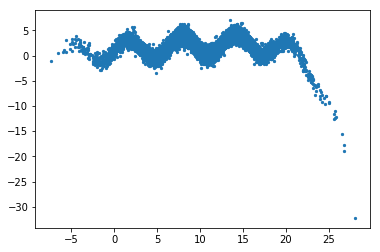

In [2]:
df = pd.DataFrame({
    'X': np.random.normal(10, 5, 10000)
})
def _analytical(x):
    return 2.*np.sin(x) + np.exp(0.1*x) - np.exp(0.005*x**2) + np.random.normal(1., .8)
%time df['Y'] = df.X.apply(_analytical)
%time df['Z'] = _analytical(df.X)
display(df[:5])
plt.scatter(df.X, df.Y, s=5)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
train, test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=17, shuffle=True)

In [5]:
p4 = np.poly1d(np.polyfit(train.X, train.Y, 17))
print p4

            17             16             15             14
-6.323e-17 x  + 1.016e-14 x  - 6.811e-13 x  + 2.395e-11 x 
              13             12             11             10
 - 4.327e-10 x  + 2.086e-09 x  + 6.284e-08 x  - 1.088e-06 x 
             9            8             7            6          5
 + 1.87e-06 x + 8.82e-05 x - 0.0005472 x - 0.002642 x + 0.0261 x
            4          3           2
 + 0.02957 x - 0.4699 x - 0.08472 x + 2.572 x + 0.9943


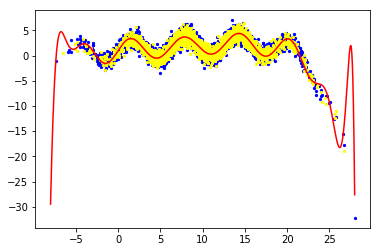

In [6]:
x_show = np.arange(-8, 28, 0.001)
plt.scatter(train.X, train.Y, s=5, color='blue', marker='o')
plt.scatter(test.X, test.Y, s=5, color='yellow', marker='x')
plt.plot(x_show, p4(x_show), c='r')

In [7]:
print "training set model score: ", r2_score(train.Y, p4(train.X))
print "testing set model score: ", r2_score(test.Y, p4(test.X))

training set model score:  0.802092861755
testing set model score:  0.799592923478


###### Naive Bayes

In [8]:
import os
import io
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [9]:
train = pd.read_csv('data/train_processed.csv')
test = pd.read_csv('./data/test_processed.csv')
display(train[:3])
display(test[:3])

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0


,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland


In [10]:
vectorizer = CountVectorizer()
%time counts = vectorizer.fit_transform(train.comment_text.values)

CPU times: user 13.8 s, sys: 487 ms, total: 14.3 s
Wall time: 14.2 s


In [11]:
%%time
classifier = MultinomialNB()
targets = train.toxic.values
classifier.fit(counts, targets)

CPU times: user 97.7 ms, sys: 13.5 ms, total: 111 ms
Wall time: 110 ms


In [12]:
%%time
test_counts = vectorizer.transform(test.comment_text.values)
test_predictions = classifier.predict_proba(test_counts)
print test_predictions[:5]

[[  4.32694076e-23   1.00000000e+00]
 [  9.99956090e-01   4.39101443e-05]
 [  9.59867038e-01   4.01329618e-02]
 [  1.00000000e+00   1.59704189e-10]
 [  9.96248533e-01   3.75146696e-03]]
CPU times: user 11.7 s, sys: 249 ms, total: 12 s
Wall time: 11.9 s


###### Clustering

96
390
233
39


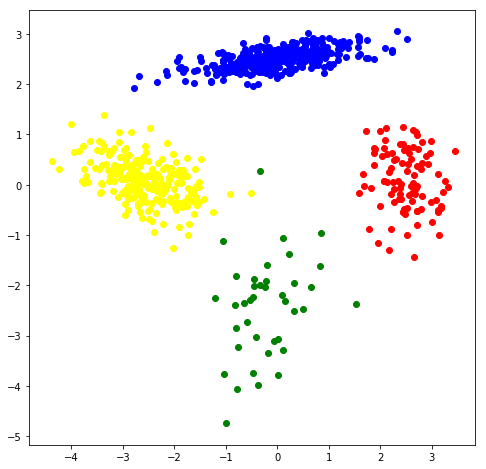

In [13]:
LIMT = 500
means = [[2.5, 0], [0, 2.5], [-2.5, 0], [0, -2.5]]
colors = ['red', 'blue', 'yellow', 'green']
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
pts = []
for m, c in zip(means, colors):
    dev1 = np.random.rand()
    dev2 = np.random.rand()
    offdiag = 2.* (0.5 - np.random.rand()) * np.sqrt(dev1 * dev2)
    tmp_pts = np.random.multivariate_normal(np.array(m), 
                                            np.array([[dev1, offdiag], [offdiag, dev2]]), 
                                            np.random.randint(LIMT))
    axes.scatter(tmp_pts[:, 0], tmp_pts[:, 1], color=c)
    print len(tmp_pts)
    pts.append(np.array(tmp_pts))

In [14]:
train = np.concatenate(pts)
np.random.shuffle(train)
print train[:5]

[[-2.60570872  0.5479792 ]
 [-0.87629017  2.55797035]
 [ 0.3970501   2.66719467]
 [-3.53625871  0.34052735]
 [ 2.13704709  0.05429849]]


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

Creating Model

In [16]:
n_cls = 4
model = KMeans(n_clusters=n_cls)
model.fit(scale(train))
print model.labels_

[2 1 1 2 0 1 2 2 1 1 1 1 1 1 0 2 1 2 0 1 2 1 2 1 1 2 1 1 2 2 0 1 2 1 1 1 2
 2 2 2 2 1 1 1 1 1 2 1 2 2 2 1 1 0 2 2 1 2 2 1 1 1 1 0 2 1 1 1 1 1 1 1 2 2
 1 2 1 2 2 1 1 2 0 0 1 1 1 1 2 0 1 1 1 0 2 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1
 1 3 3 1 0 1 1 1 0 2 1 2 1 2 2 1 1 1 2 1 0 2 1 3 2 1 1 2 2 0 1 1 3 1 1 1 1
 1 1 1 2 1 1 0 1 2 2 1 1 1 1 1 1 2 0 1 3 1 1 1 0 0 1 0 2 2 1 2 1 2 2 1 0 0
 0 2 1 1 3 1 1 3 2 1 2 1 1 3 0 0 2 1 1 1 0 0 0 2 1 1 1 3 2 1 2 1 1 1 2 1 2
 1 1 3 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 2 3 1 1 1 2 2 1 2 1 2 3 1 1 1
 1 1 2 3 2 1 1 2 2 0 1 2 0 1 1 1 2 2 1 1 2 1 1 1 3 1 2 2 1 3 2 1 1 1 1 1 2
 2 1 2 1 0 0 1 2 2 1 1 1 1 2 0 1 2 1 0 1 0 1 1 1 2 1 0 3 1 1 1 2 1 1 2 1 1
 1 2 1 3 0 1 2 0 1 1 0 0 2 1 1 2 1 2 0 0 1 2 1 1 1 1 2 2 2 1 1 2 2 2 1 1 0
 3 2 1 1 0 1 2 1 2 1 1 1 1 2 2 1 2 3 1 1 1 1 0 1 2 2 1 2 1 2 0 1 1 2 1 2 2
 1 3 1 2 0 1 2 2 2 2 1 0 2 2 2 0 2 2 1 3 1 0 1 2 1 2 1 0 1 2 2 1 2 2 1 2 1
 1 0 1 2 2 1 2 2 0 1 2 2 3 1 1 2 2 2 1 1 1 1 2 2 1 1 2 1 3 1 2 1 1 1 2 2 1
 1 1 2 1 1 1 2 1 1 2 2 0 

Show the results

97
387
237
37


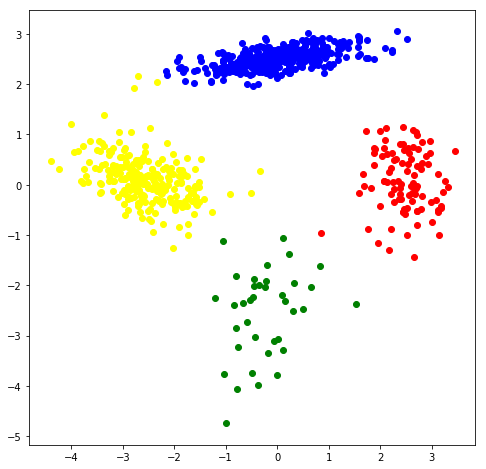

In [17]:
colors = ['red', 'blue', 'yellow', 'green', 'black', 'brown']
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
for i in range(n_cls):
    tmp_pts = train[(model.labels_ == i)]
    print len(tmp_pts)
    axes.scatter(tmp_pts[:, 0], tmp_pts[:, 1], color=colors[i])

##### Decision Tree
- At each step, find the attribute we can use to partition the data set to minimize the entropy of the data at the next step
- Fancy term for this simple algorithm: ID3
- It is a greedy algorithm - as it goes down the tree, it just picks the decision that reduce entropy the most at that stage.
    - That might not actually result in an optimal tree.
    - But it works

##### Random Forests
- Decision trees are very susceptible to overfitting
- To fight this, we can construct several alternate decision trees and let them "vote" on the final classification
     - Randomly re-sample the input data for each tree (fancy term for this: bootstrap agrregating or bagging)
     - Randomize the subset of the attributes each step is allowed to choose from.

In [18]:
from sklearn import tree
df = pd.read_csv('./PastHires.csv')
df.columns = ['year', 'empl', 'pemp', 'educ', 'tops', 'intn', 'hird']
display(df[:4])

,year,empl,pemp,educ,tops,intn,hird
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y


Turn dataframe value into numbers

In [19]:
df.empl = df.empl.map({'Y': 1, 'N': 0})
df.educ = df.educ.map({'BS': 0, 'MS': 1, 'PhD':2})
df.tops = df.tops.map({'Y': 1, 'N': 0})
df.intn = df.intn.map({'Y': 1, 'N': 0})
df.hird = df.hird.map({'Y': 1, 'N': 0})
display(df[:4])

,year,empl,pemp,educ,tops,intn,hird
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1


In [20]:
features = df.columns[:6]
X = df[features]
y = df.hird
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Display the tree

In [21]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

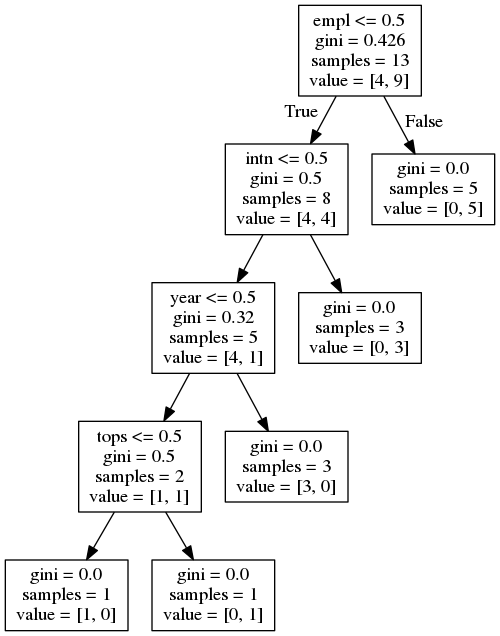

In [22]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

print clf.predict_proba([[10, 1, 4, 0, 0, 0]])
print clf.predict_proba([[10, 0, 4, 0, 0, 0]])

[[ 0.1  0.9]]
[[ 0.5  0.5]]


##### Support Vector Machines
Generate fake data like clustering

[[-3.73872459 -0.03510729  2.        ]
 [-0.052349    2.68979161  1.        ]
 [ 0.13597936 -2.54506421  3.        ]
 [ 2.77858773  0.23944768  0.        ]
 [ 0.44663162 -2.28898181  3.        ]]


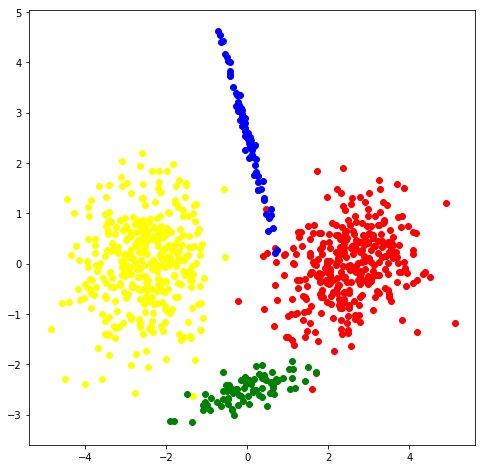

In [24]:
LIMT = 500
means = [[2.5, 0], [0, 2.5], [-2.5, 0], [0, -2.5]]
colors = ['red', 'blue', 'yellow', 'green']
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
pts = []
for i, m in enumerate(means):
    dev1 = np.random.rand()
    dev2 = np.random.rand()
    offdiag = 2.* (0.5 - np.random.rand()) * np.sqrt(dev1 * dev2)
    tmp_n = np.random.randint(LIMT)
    tmp_pts = np.concatenate([
        np.random.multivariate_normal(np.array(m), np.array([[dev1, offdiag], [offdiag, dev2]]), tmp_n), 
        np.ones((tmp_n, 1)) * i], axis=1)
    axes.scatter(tmp_pts[:, 0], tmp_pts[:, 1], color=colors[i])
    pts.append(np.array(tmp_pts))
train = np.concatenate(pts)
np.random.shuffle(train)
print train[:5]

In [25]:
from sklearn import svm, datasets
C = 1.
svc = svm.SVC(kernel='linear', C=C).fit(train[: , :2], train[: , 2])

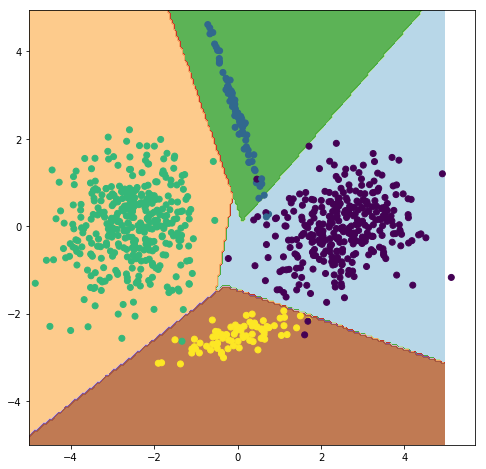

In [28]:
def plotPred(clf):
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize=(8, 8))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(train[:, 0], train[:, 1], c=train[:, 2].astype(np.float))
    plt.show()
plotPred(svc)

In [27]:
x = np.array([1, 7])
y = np.array([2, 3])
np.c_[x, y]

array([[1, 2],
       [7, 3]])